<a href="https://colab.research.google.com/github/you444Mo/Python-Projects/blob/main/Diabetes_Prediction_(Kaggle_Challenge).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diabetes Prediction Kaggle Competition

Background:

Dataset Description

The dataset includes patient profiles with features based on demographics, lifestyle habits, family history, and clinical measurements that are well-established indicators of diabetes risk. All data is generated using statistical distributions inspired by real-world medical research, ensuring privacy preservation while reflecting realistic health patterns.

Features:

* Column	Type	Description	Values/Range

* patient_id	Integer	Unique patient identifier

* age	Integer	Age of patient in years	18–90

* gender	String	Patient gender	'Male', 'Female', 'Other'

* ethnicity	String	Ethnic background	'White', 'Hispanic', 'Black', 'Asian','Other'

* education_level	String	Highest completed education	'No formal', 'Highschool', * 'Graduate', 'Postgraduate'

* income_level	String	Income category	'Low', 'Medium', 'High'

* employment_status	String	Employment type	'Employed', 'Unemployed', 'Retired', * 'Student'

* smoking_status	String	Smoking behavior	'Never', 'Former', 'Current'

* alcohol_consumption_per_week	Float	Drinks consumed per week	0–30

* physical_activity_minutes_per_week	Integer	Physical activity (weekly minutes)	* 0–600

* diet_score	Integer	Diet quality (higher = healthier)	0–10

* sleep_hours_per_day	Float	Average daily sleep hours	3–12

* screen_time_hours_per_day	Float	Average daily screen time hours	0–12

* family_history_diabetes	Integer	Family history of diabetes	0 = No, 1 = Yes

* hypertension_history	Integer	Hypertension history	0 = No, 1 = Yes

* cardiovascular_history	Integer	Cardiovascular history	0 = No, 1 = Yes

* bmi	Float	Body Mass Index (kg/m²)	15–45

* waist_to_hip_ratio	Float	Waist-to-hip ratio	0.7–1.2

* systolic_bp	Integer	Systolic blood pressure (mmHg)	90–180

* diastolic_bp	Integer	Diastolic blood pressure (mmHg)	60–120

* heart_rate	Integer	Resting heart rate (bpm)	50–120

* cholesterol_total	Float	Total cholesterol (mg/dL)	120–300

* hdl_cholesterol	Float	HDL cholesterol (mg/dL)	20–100

* ldl_cholesterol	Float	LDL cholesterol (mg/dL)	50–200

* triglycerides	Float	Triglycerides (mg/dL)	50–500

* glucose_fasting	Float	Fasting glucose (mg/dL)	70–250

* glucose_postprandial	Float	Post-meal glucose (mg/dL)	90–350

* insulin_level	Float	Blood insulin level (µU/mL)	2–50

* hba1c	Float	HbA1c (%)	4–14

* diabetes_risk_score	Integer	Risk score (calculated, 0–100)	0–100

* diabetes_stage	String	Stage of diabetes	'No Diabetes', 'Pre-Diabetes', 'Type * 1', 'Type 2', 'Gestational'

* diagnosed_diabetes	Integer	Target: Diabetes diagnosis	0 = No, 1 = Yes

In [ ]:
### Import Needed Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
import scipy.stats as st
from scipy.stats import pointbiserialr

from imblearn.over_sampling import SMOTE, SMOTENC ### SMOTENC is usefull when your data contains both categorical and continous variables
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

### upload kaggle.json here
from google.colab import files
files.upload()

Saving kaggle (5).json to kaggle (5) (1).json


{'kaggle (5) (1).json': b'{"username":"zachmoreimi","key":"564ffb38213e034ddec05b758cd54cf8"}'}

In [ ]:
#pandas setting
pd.set_option('display.float_format', '{:.2f}'.format) ### Turn off scientific notation (format float)
pd.set_option('display.max_columns', None) ### always show me all columns

### Load Data From Kaggle

In [ ]:
### Kaggle setup within colab
!mkdir -p ~/.kaggle
!cp "/content/kaggle (5).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
### Download Competition data
!kaggle competitions download -c playground-series-s5e12

playground-series-s5e12.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
### Unzip Data
!unzip playground-series-s5e12.zip

Archive:  playground-series-s5e12.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: train.csv               


In [ ]:
### Read Data Into DFs
Diabetes_Train = pd.read_csv("train.csv")
Diabetes_Test = pd.read_csv("test.csv")
Diabetes_Sample = pd.read_csv("sample_submission.csv")

### EDA

In [ ]:
### View Shape of Data
print(Diabetes_Train.shape)
print(Diabetes_Test.shape)

(700000, 26)
(300000, 25)


In [ ]:
### View Column Types
Diabetes_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [ ]:
### View First View Rows of Data
Diabetes_Train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.70,6.80,6.10,33.40,0.93,112,70,62,199,58,114,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.00
1,1,50,2,73,5.70,6.50,5.80,23.80,0.83,120,77,71,199,50,121,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.00
2,2,32,3,158,8.50,7.40,9.10,24.10,0.83,95,89,73,188,59,114,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.00
3,3,54,3,77,4.60,7.00,9.20,26.60,0.83,121,69,74,182,54,85,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.00
4,4,54,1,55,5.70,6.20,5.10,28.80,0.90,108,60,85,206,49,131,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.00


In [ ]:
### See Descriptive Stats on Data
Diabetes_Train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,700000.00,349999.50,202072.74,0.00,174999.75,349999.50,524999.25,699999.00
age,700000.00,50.36,11.66,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.00,2.07,1.05,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.00,80.23,51.20,1.00,49.00,71.00,96.00,747.00
diet_score,700000.00,5.96,1.46,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.00,7.00,0.90,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.00,6.01,2.02,0.60,4.60,6.00,7.40,16.50
bmi,700000.00,25.87,2.86,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.00,0.86,0.04,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.00,116.29,11.01,91.00,108.00,116.00,124.00,163.00


In [ ]:
### Check for nulls
Diabetes_Train.isnull().sum()

,0
id,0
age,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0
sleep_hours_per_day,0
screen_time_hours_per_day,0
bmi,0
waist_to_hip_ratio,0
systolic_bp,0


In [ ]:
### Check for Dupes
Diabetes_Train[Diabetes_Train.duplicated]

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes


In [ ]:
### Summarize Diabetes Diagnosis by Alchol Consumption Per Week
Alch_Summary = pd.DataFrame(
    Diabetes_Train.groupby('alcohol_consumption_per_week').agg(
        {
            'diagnosed_diabetes' : ['sum','count','mean']
            }
        ).reset_index()
  )

Alch_Summary

alcohol_consumption_per_week diagnosed_diabetes             
                                              sum   count mean
0                            1          152431.00  246311 0.62
1                            2          154567.00  246592 0.63
2                            3           85908.00  137565 0.62
3                            4           33343.00   52973 0.63
4                            5            8079.00   13322 0.61
5                            6            1676.00    2728 0.61
6                            7             266.00     447 0.60
7                            8              36.00      59 0.61
8                            9               1.00       3 0.33

Seems like regardless the number of drinks consumed per week, the diagnosis rate remains fairly constant.

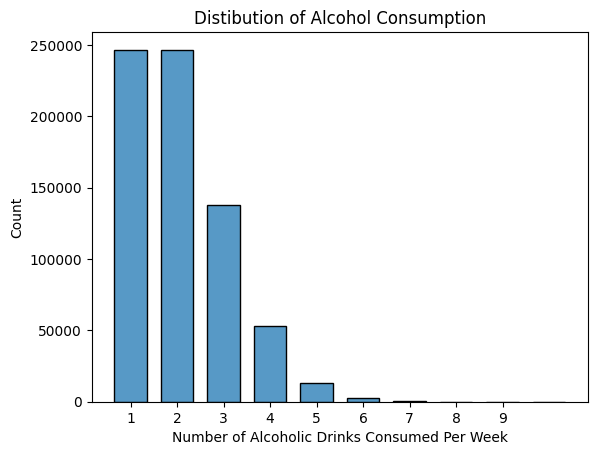

In [ ]:
### Alcohol Consumption Chart
sns.histplot(
    data = Diabetes_Train,
    x = 'alcohol_consumption_per_week',
    binrange= (np.min(Diabetes_Train['alcohol_consumption_per_week']) - 0.5, np.max(Diabetes_Train['alcohol_consumption_per_week'] + 1.5)),
    binwidth= 1,
    shrink= 0.7
    )

plt.xticks([i for i in Diabetes_Train['alcohol_consumption_per_week'].unique()])
plt.xlabel("Number of Alcoholic Drinks Consumed Per Week")
plt.title("Distibution of Alcohol Consumption")
plt.show()

Looks like a vast majority of the individuals in the data have between 1 and 4 drinks per week.

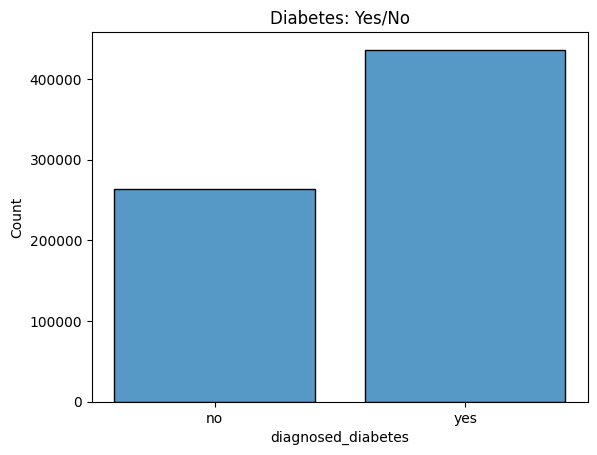

In [ ]:
### Check For balance of target variable
sns.histplot(
    data = Diabetes_Train,
    x = 'diagnosed_diabetes',
    binrange = (np.min(Diabetes_Train['diagnosed_diabetes']) - 0.5, np.min(Diabetes_Train['diagnosed_diabetes']) + 1.5),
    binwidth = 1,
    shrink= 0.8
)
plt.xticks([0,1], ['no','yes'])
plt.title("Diabetes: Yes/No")
plt.show()

More Skewed towards the postive class, but not heavily, will still attempt class_weight parameter from sklearn.

Correlation/outlier analysis

In [ ]:
### Drop ID Field
# Train Set
Diabetes_Train = Diabetes_Train.drop(columns = ['id'])

In [ ]:
# Test Set (Kaggle)
Diabetes_Test = Diabetes_Test.drop(columns = ['id'])

In [ ]:
Vars_Corr = list(Diabetes_Train.select_dtypes(include = ['float64','int64']).columns)

In [ ]:
Binary_Var = ['diagnosed_diabetes']

In [ ]:
### Remove Binary Vars and ID
Vars_Corr.remove('diagnosed_diabetes')
# Vars_Corr.remove('alcohol_consumption_per_week')
Vars_Corr.remove('family_history_diabetes')
Vars_Corr.remove('hypertension_history')
Vars_Corr.remove('cardiovascular_history')

In [ ]:
### Take Product of lists to pair Diabetes Diagnosis with each explanatory Variable
Combined_Vars = list(product(Binary_Var,Vars_Corr))

In [ ]:
### Compute Correlation Coefficients and P-Values
Coeff_Lst = []
Pvalue_Lst = []
for Bin,Cont in Combined_Vars:
  correlation, p_value = pointbiserialr(Diabetes_Train[Bin], Diabetes_Train[Cont])
  Coeff_Lst.append(float(correlation))
  Pvalue_Lst.append(p_value.astype('float64'))
  print(f"The Correlation Coefficient Between {Bin} and {Cont} is {correlation}, with a p-value of {p_value}.\n")

The Correlation Coefficient Between diagnosed_diabetes and age is 0.161162449350645, with a p-value of 0.0.

The Correlation Coefficient Between diagnosed_diabetes and alcohol_consumption_per_week is 0.002990931289226199, with a p-value of 0.012335663553767692.

The Correlation Coefficient Between diagnosed_diabetes and physical_activity_minutes_per_week is -0.16978868414956996, with a p-value of 0.0.

The Correlation Coefficient Between diagnosed_diabetes and diet_score is -0.05011942721024825, with a p-value of 0.0.

The Correlation Coefficient Between diagnosed_diabetes and sleep_hours_per_day is 0.0035086035502997263, with a p-value of 0.003329975897429363.

The Correlation Coefficient Between diagnosed_diabetes and screen_time_hours_per_day is 0.018212898278031932, with a p-value of 1.9411330401747047e-52.

The Correlation Coefficient Between diagnosed_diabetes and bmi is 0.10557996878711717, with a p-value of 0.0.

The Correlation Coefficient Between diagnosed_diabetes and waist_

In [ ]:
### Create Dataframe of Coefficietns
Corr_DataFrame = pd.DataFrame(data = {'Coefficients' : Coeff_Lst, 'P_values' : Pvalue_Lst},index = Vars_Corr).sort_values(by = 'Coefficients', ascending = False)

Corr_DataFrame

,Coefficients,P_values
age,0.16,0.00
systolic_bp,0.11,0.00
bmi,0.11,0.00
ldl_cholesterol,0.10,0.00
triglycerides,0.09,0.00
cholesterol_total,0.09,0.00
waist_to_hip_ratio,0.08,0.00
diastolic_bp,0.04,0.00
heart_rate,0.02,0.00
screen_time_hours_per_day,0.02,0.00


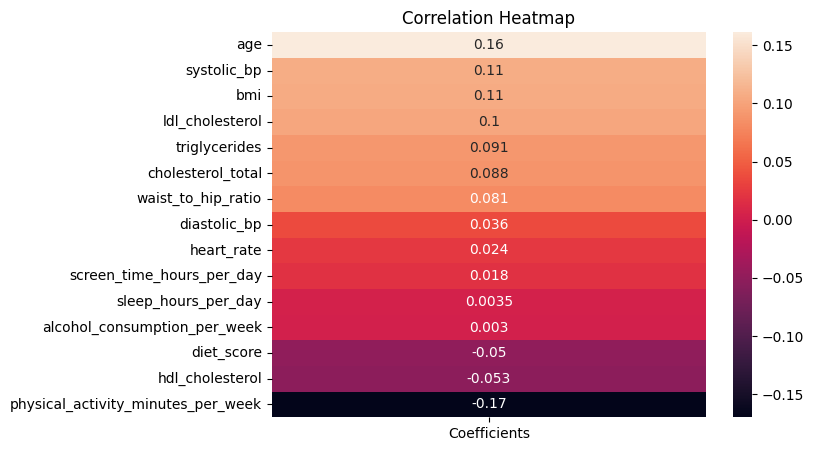

In [ ]:
### Show Heatmap
plt.figure(figsize = (7,5))
sns.heatmap(data = Corr_DataFrame[['Coefficients']], annot = True)
plt.title("Correlation Heatmap")
plt.show()

**<u>Notes:</u>**

Age, systolic_bp, bmi, ldl_cholestrol show the most positive, statistically significant assoications with diabetes diagnosis.

Physical_activity_minutes_Per_Week, hdl_cholesterol, and diet_score show negative associations with diabetes diagnosis (makes sense).

In [ ]:
### Averages for Various Metrics (Diabetes Diagnosed vs Non-Diabetes Diagnosed)
Diabetes_Train.groupby('diagnosed_diabetes').agg(
    {
        'sleep_hours_per_day' : 'mean',
        'physical_activity_minutes_per_week' : 'mean',
        'screen_time_hours_per_day' : 'mean',
        'bmi' : 'mean',
        'waist_to_hip_ratio' : 'mean',
        'triglycerides': 'mean'
    }
)

,sleep_hours_per_day,physical_activity_minutes_per_week,screen_time_hours_per_day,bmi,waist_to_hip_ratio,triglycerides
diagnosed_diabetes,,,,,,
0.00,7.00,91.41,5.97,25.49,0.85,120.20
1.00,7.00,73.47,6.04,26.11,0.86,124.83


### Feature Engineering

In [ ]:
Diabetes_Train.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,45,7.70,6.80,6.10,33.40,0.93,112,70,62,199,58,114,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.00
1,50,2,73,5.70,6.50,5.80,23.80,0.83,120,77,71,199,50,121,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.00
2,32,3,158,8.50,7.40,9.10,24.10,0.83,95,89,73,188,59,114,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.00
3,54,3,77,4.60,7.00,9.20,26.60,0.83,121,69,74,182,54,85,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.00
4,54,1,55,5.70,6.20,5.10,28.80,0.90,108,60,85,206,49,131,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.00


In [ ]:
### Remove Alcohol Consumption Variable
Vars_Interaction = Vars_Corr.copy()
Vars_Interaction.remove("alcohol_consumption_per_week")

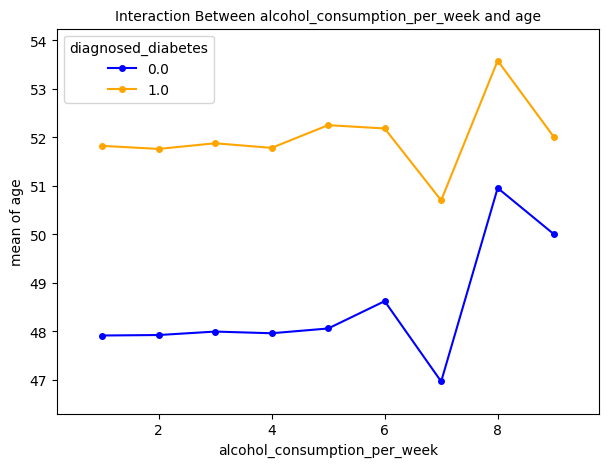

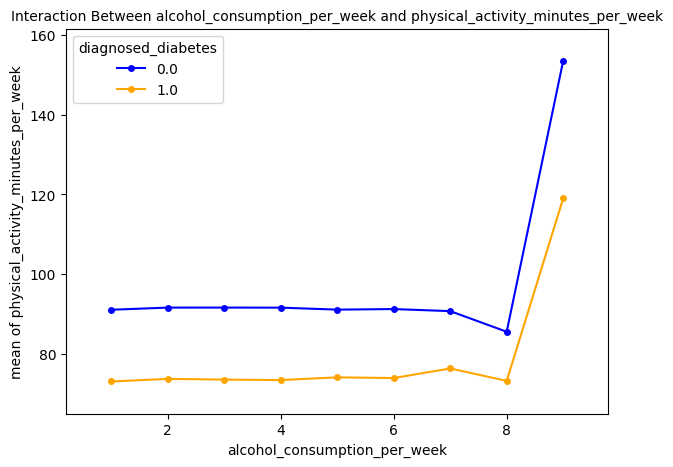

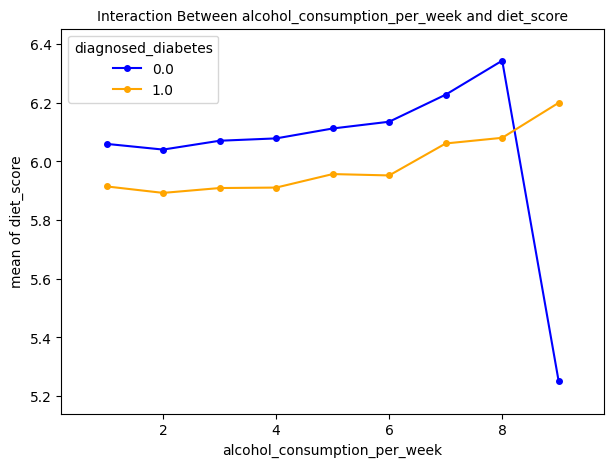

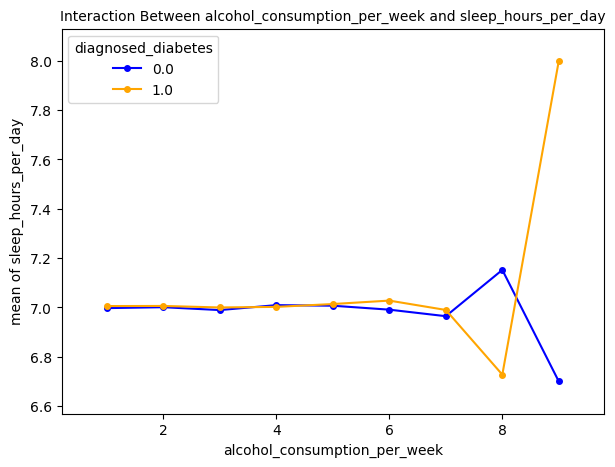

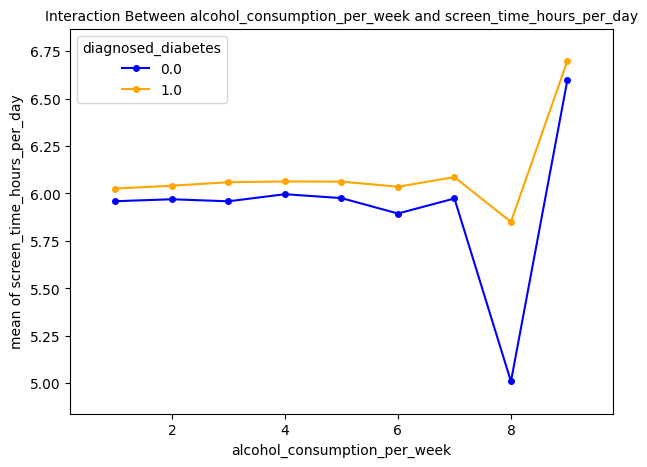

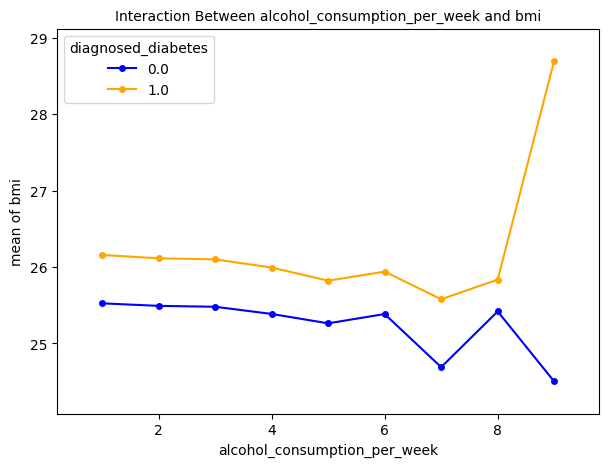

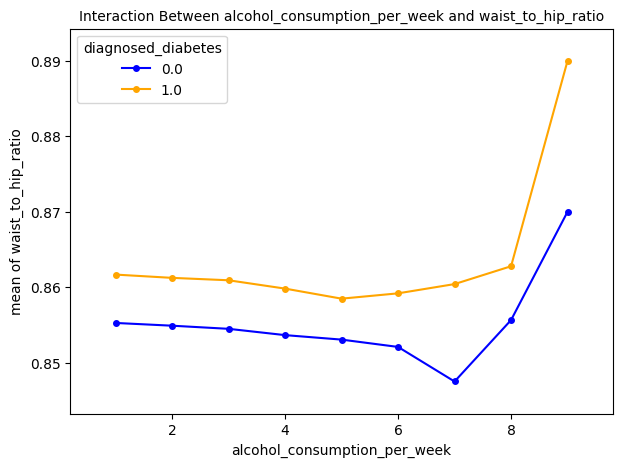

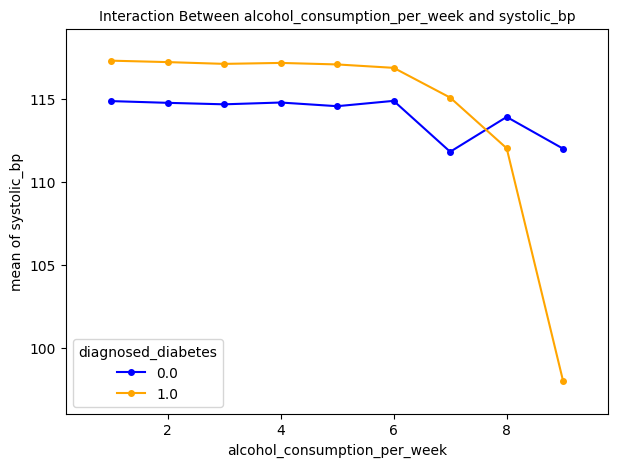

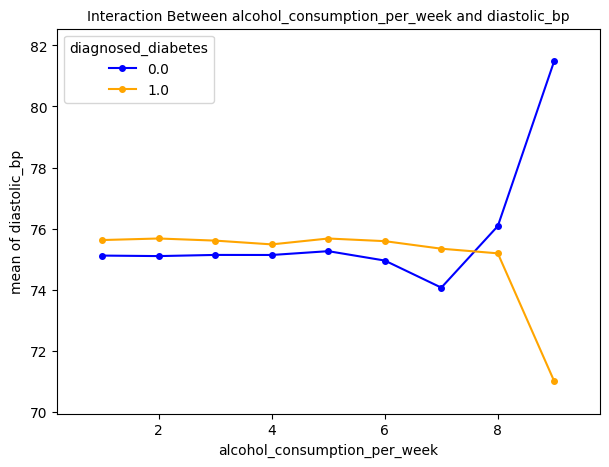

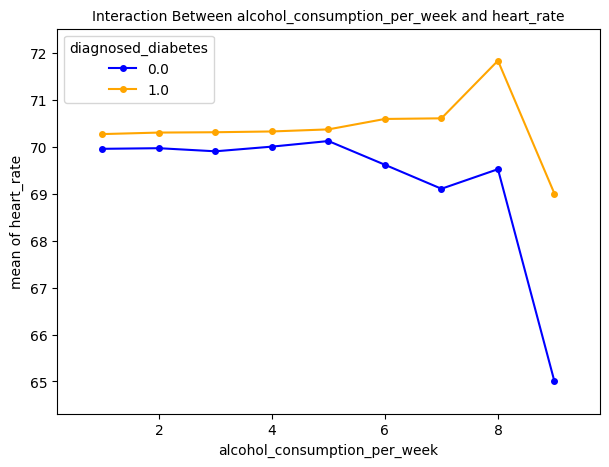

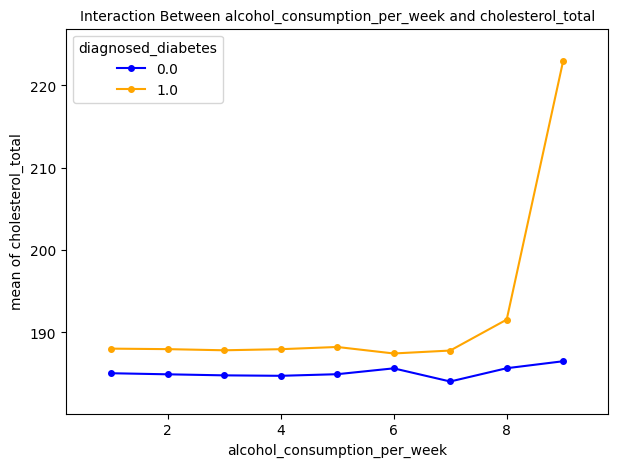

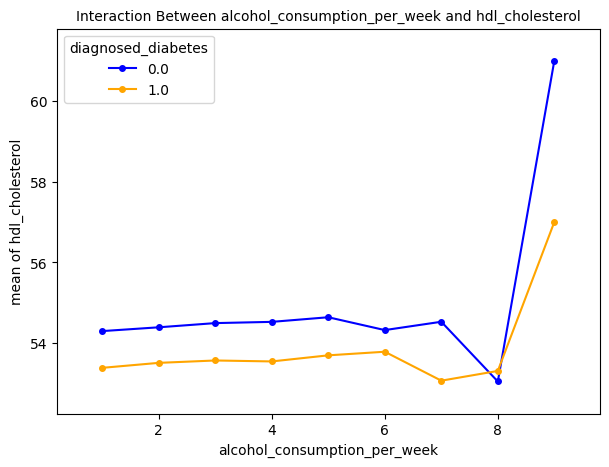

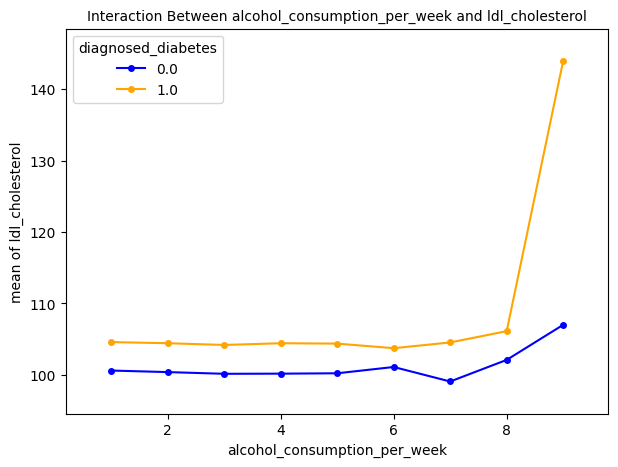

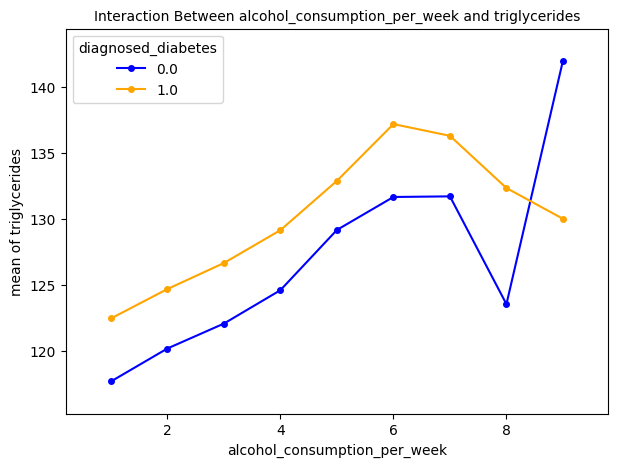

In [ ]:
### Plot interaction Terms

for x in Vars_Interaction:

  fig, ax = plt.subplots(figsize = (7,5))

  interaction_plot(
      x = Diabetes_Train['alcohol_consumption_per_week'],
      trace = Diabetes_Train['diagnosed_diabetes'],
      response = Diabetes_Train[x],
      colors = ['blue','orange'],
      ms = 8,
      ax = ax
  )

  # plt.xlabel(fontsize = 7)
  plt.title(f"Interaction Between alcohol_consumption_per_week and {x}", fontsize = 10)


  plt.tight_layout
  plt.show()
  print()

Potential Interactions:
* Alcohol_Consumption_Per Week & Triglycerides
* Alcohol_Consumption_Per Week & HDL Cholesterol
* Alcohol_Consumption_Per Week & Diastolic_BP
* Alcohol_Consumption_Per Week & Systolic_BP
* Alcohol_Consumption_Per Week & sleep_hours_per_day
* Alcohol_Consumption_Per Week & diet_score

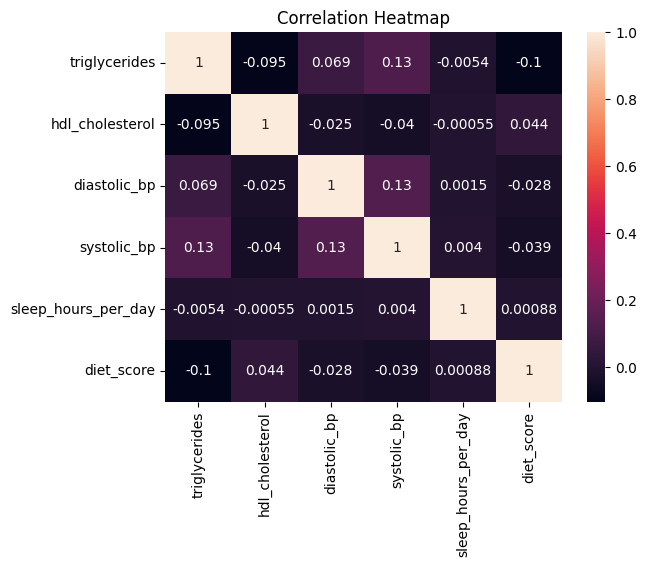

In [ ]:
### Checking Correlations between terms
lst1 = ['triglycerides','hdl_cholesterol','diastolic_bp','systolic_bp','sleep_hours_per_day','diet_score']
sns.heatmap(Diabetes_Train[lst1].corr(),annot = True)
plt.title("Correlation Heatmap")
plt.show()

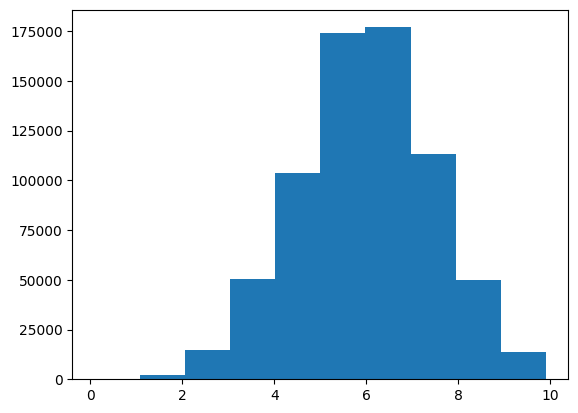

In [ ]:
### Distribution of Diet Score
plt.hist(Diabetes_Train['diet_score'])
plt.show()

#### Determinisitic Features (Prior to Split)

In [ ]:
### Training Set (Kaggle)
#### Features that can be added pre train test split (Deterministic Features)
### Blood pressure and cholesterol Ratios
Diabetes_Train['Systolic_Diastolic_Ratio'] = Diabetes_Train['systolic_bp'] / Diabetes_Train['diastolic_bp']
Diabetes_Train['Good_Vs_Bad_Chol_Ratio'] = Diabetes_Train['hdl_cholesterol'] / Diabetes_Train['ldl_cholesterol']
### Add Interaction Terms between alcohol Consumption and various features
Diabetes_Train['Alc_Consumption_DietScore'] = Diabetes_Train['alcohol_consumption_per_week'] * Diabetes_Train['diet_score']
Diabetes_Train['Alc_Consumption_SleepHours'] = Diabetes_Train['alcohol_consumption_per_week'] * Diabetes_Train['sleep_hours_per_day']
Diabetes_Train['Alc_Consumption_systolicbp'] = Diabetes_Train['alcohol_consumption_per_week'] * Diabetes_Train['systolic_bp']
Diabetes_Train['Alc_Consumption_diastolicbp'] = Diabetes_Train['alcohol_consumption_per_week'] * Diabetes_Train['diastolic_bp']
Diabetes_Train['Alc_Consumption_hdlChol'] = Diabetes_Train['alcohol_consumption_per_week'] * Diabetes_Train['hdl_cholesterol']
Diabetes_Train['Alc_Consumption_triglycerides'] = Diabetes_Train['alcohol_consumption_per_week'] * Diabetes_Train['triglycerides']

In [ ]:
### Test Set (Kaggle)
#### Features that can be added pre train test split (Deterministic Features)
### Blood pressure and cholesterol Ratios
Diabetes_Test['Systolic_Diastolic_Ratio'] = Diabetes_Test['systolic_bp'] / Diabetes_Test['diastolic_bp']
Diabetes_Test['Good_Vs_Bad_Chol_Ratio'] = Diabetes_Test['hdl_cholesterol'] / Diabetes_Test['ldl_cholesterol']
### Add Interaction Terms between alcohol Consumption and various features
Diabetes_Test['Alc_Consumption_DietScore'] = Diabetes_Test['alcohol_consumption_per_week'] * Diabetes_Test['diet_score']
Diabetes_Test['Alc_Consumption_SleepHours'] = Diabetes_Test['alcohol_consumption_per_week'] * Diabetes_Test['sleep_hours_per_day']
Diabetes_Test['Alc_Consumption_systolicbp'] = Diabetes_Test['alcohol_consumption_per_week'] * Diabetes_Test['systolic_bp']
Diabetes_Test['Alc_Consumption_diastolicbp'] = Diabetes_Test['alcohol_consumption_per_week'] * Diabetes_Test['diastolic_bp']
Diabetes_Test['Alc_Consumption_hdlChol'] = Diabetes_Test['alcohol_consumption_per_week'] * Diabetes_Test['hdl_cholesterol']
Diabetes_Test['Alc_Consumption_triglycerides'] = Diabetes_Test['alcohol_consumption_per_week'] * Diabetes_Test['triglycerides']

#### Split Kaggle Training Data into Train and Test

In [ ]:
### Target
y = Diabetes_Train['diagnosed_diabetes']
### Features
x = Diabetes_Train.drop(columns = 'diagnosed_diabetes')

In [ ]:
### Train Test Split
X_Train, X_Test, y_train, y_test, = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify= y)

#### Stochastic Features

Done to avoid data leakage

In [ ]:
#### Create an Age_Squared Function

def age_squared(df,age):
  '''Input Dataframe and name of age field'''
  '''Age is first Demeaned to account for large variances'''
  df['age_squared'] = (df[age] - np.mean(df[age])) ** 2


In [ ]:
#### Create Diet Score Segment Function

def DietScore_Segments(df,score):
  '''Input Dataframe and name of diet score field'''
  '''Create Diet Score Segments'''
  df['Diet_Score_Segments'] = pd.cut(
      df[score],
      bins = 3, ### Creates 3 equal sized bins
      labels = ['Between 0 and 3.4','Between 3.4 and 6.6','Between 6.6 and 10']
  )


In [ ]:
#### Training
### Create Diet Score Segments
DietScore_Segments(X_Train,'diet_score')
DietScore_Segments(X_Test,'diet_score')

### Create Age Squared Fields
age_squared(X_Train,'age')
age_squared(X_Test,'age')

In [ ]:
#### Testomg
### Create Diet Score Segments
DietScore_Segments(Diabetes_Test,'diet_score')
### Create Age Squared Fields
age_squared(Diabetes_Test,'age')

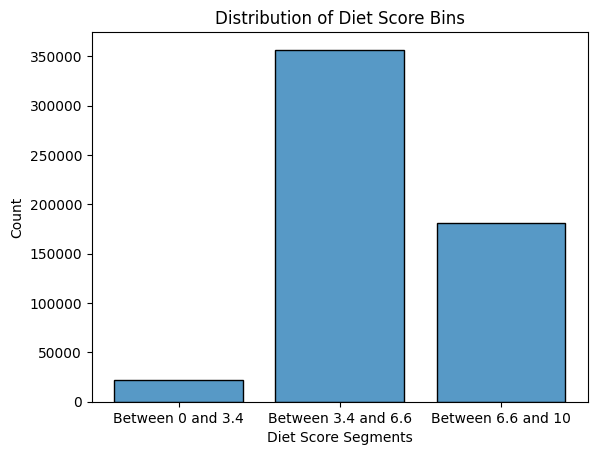

In [ ]:
### View Distribution of Diet Score Segment Bins
sns.histplot(
    data = X_Train,
    x = 'Diet_Score_Segments',
    binwidth = 1,
    shrink= 0.8
  )

plt.xlabel("Diet Score Segments")
plt.title("Distribution of Diet Score Bins")

plt.show()

#### Create Dummy Fields

In [ ]:
### Dummy Var Function
def dummies (df):
  ### Grab Categorical Fields
  ### Create Dummy Fields
  return pd.get_dummies(
    data = df.select_dtypes(include = ['object','category']),
    drop_first= True,
    dtype = int
  )


In [ ]:
### Apply to Train and Test
# Train
Diabetes_Train_Dummy = dummies(X_Train)
# Test
Diabetes_Test_Dummy = dummies(X_Test)

In [ ]:
#### Apply to Kaggle Testing Set
Diabetes_Test_Dummy_Kaggle = dummies(Diabetes_Test)

#### Scale Features

In [ ]:
### Remove Categorical Fields (Training and Testing)
# Train
X_Train_non_dummy = X_Train.select_dtypes(include = ['int64','float64'])
X_Train_non_dummy = X_Train_non_dummy.drop(columns = ['family_history_diabetes','hypertension_history','cardiovascular_history'])
# Test
X_Test_non_dummy = X_Test.select_dtypes(include = ['int64','float64'])
X_Test_non_dummy = X_Test_non_dummy.drop(columns = ['family_history_diabetes','hypertension_history','cardiovascular_history'])

In [ ]:
#### Remove Categorical Fields from Kaggle Test Set
X_Test_non_dummy_kaggle = Diabetes_Test.select_dtypes(include = ['int64','float64'])
X_Test_non_dummy_kaggle = X_Test_non_dummy_kaggle.drop(columns = ['family_history_diabetes','hypertension_history','cardiovascular_history'])

In [ ]:
### Set Scalar Object (Fit on Training Data)
Scaler = StandardScaler()
### Scale Non Dummy Fields
Diabetes_Train_Scaled = Scaler.fit_transform(X_Train_non_dummy)
### Insert Scaled data into dataframe
Diabetes_Train_Scaled_DF = pd.DataFrame(Diabetes_Train_Scaled, columns = X_Train_non_dummy.columns, index = X_Train_non_dummy.index)
### View Scaled DF
Diabetes_Train_Scaled_DF.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,Systolic_Diastolic_Ratio,Good_Vs_Bad_Chol_Ratio,Alc_Consumption_DietScore,Alc_Consumption_SleepHours,Alc_Consumption_systolicbp,Alc_Consumption_diastolicbp,Alc_Consumption_hdlChol,Alc_Consumption_triglycerides,age_squared
79826,0.74,-0.07,-0.65,0.64,-0.11,0.04,1.30,1.35,0.52,0.67,1.27,0.37,-0.46,0.90,0.64,-0.14,-0.81,0.20,-0.09,0.02,0.05,-0.19,0.14,-0.35
630933,0.05,-0.07,-0.65,1.05,-0.22,0.39,0.32,0.30,1.06,0.08,-1.18,1.09,-0.34,0.79,0.36,0.68,-0.72,0.37,-0.12,0.12,-0.05,-0.16,0.04,-0.78
62932,0.83,0.88,1.13,-0.73,-0.22,-0.80,-1.46,-1.81,0.06,0.52,-0.75,-0.65,0.02,-0.36,-0.25,-0.37,0.09,0.33,0.77,0.89,1.00,0.84,0.63,-0.25
606332,0.23,-1.02,-1.22,-0.11,0.66,0.59,-0.13,0.30,0.52,0.52,0.98,1.45,-0.70,1.06,0.97,-0.04,-0.98,-0.92,-0.91,-0.96,-0.96,-1.06,-0.74,-0.75
353196,-0.80,3.75,-0.40,0.30,-0.78,-0.60,-2.65,-2.60,-0.30,2.28,-0.17,-0.47,2.08,-1.10,-0.93,-1.62,1.96,3.65,3.05,3.51,4.83,5.26,2.30,-0.28


In [ ]:
### Apply Scaling Transformation to Testing Data (DO NOT REFIT)
Diabetes_Test_Scaled = Scaler.transform(X_Test_non_dummy)
### Insert Scaled data into dataframe
Diabetes_Test_Scaled_DF = pd.DataFrame(Diabetes_Test_Scaled, columns = X_Test_non_dummy.columns, index = X_Test_non_dummy.index)
### View Scaled DF
Diabetes_Test_Scaled_DF.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,Systolic_Diastolic_Ratio,Good_Vs_Bad_Chol_Ratio,Alc_Consumption_DietScore,Alc_Consumption_SleepHours,Alc_Consumption_systolicbp,Alc_Consumption_diastolicbp,Alc_Consumption_hdlChol,Alc_Consumption_triglycerides,age_squared
630372,-0.20,0.88,-0.57,1.46,1.22,0.14,-0.34,-0.76,-0.66,0.08,0.12,-0.94,-0.70,-0.68,1.41,-0.62,-0.09,1.67,1.28,0.69,0.89,0.54,1.46,-0.76
141198,1.69,-1.02,-1.12,-1.27,-0.22,-0.15,1.93,2.93,1.24,0.96,-0.03,1.51,-1.07,1.48,2.67,0.17,-1.26,-1.16,-1.01,-0.89,-0.92,-1.11,-0.46,1.45
367836,2.11,-1.02,-0.81,-0.11,0.11,1.53,-0.27,0.56,1.88,1.25,0.26,2.16,2.80,1.21,-1.22,0.41,0.39,-0.92,-0.97,-0.84,-0.90,-0.58,-1.11,2.73
402311,-1.75,-0.07,-0.63,-0.18,0.22,-0.99,-0.41,-0.49,-0.21,-0.94,0.98,0.25,-0.10,0.16,0.89,0.52,-0.30,-0.13,-0.01,-0.10,-0.23,-0.09,0.22,1.62
273418,-1.32,-0.07,0.95,-0.25,1.33,-0.30,-0.24,1.09,-0.57,0.81,1.13,-0.94,0.87,-1.36,0.08,-1.01,1.50,-0.16,0.25,-0.17,0.07,0.17,-0.05,0.58


In [ ]:
### Apply Scaling Tranformation to Testing Data from Kaggle (DO NOT REFIT)
Diabetes_Test_Scaled_Kaggle = Scaler.transform(X_Test_non_dummy_kaggle)
### Insert Scaled data into dataframe
Diabetes_Test_Scaled_Kaggle_DF = pd.DataFrame(Diabetes_Test_Scaled_Kaggle, columns = X_Test_non_dummy_kaggle.columns, index = X_Test_non_dummy_kaggle.index)
### View Scaled DF
Diabetes_Test_Scaled_Kaggle_DF.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,Systolic_Diastolic_Ratio,Good_Vs_Bad_Chol_Ratio,Alc_Consumption_DietScore,Alc_Consumption_SleepHours,Alc_Consumption_systolicbp,Alc_Consumption_diastolicbp,Alc_Consumption_hdlChol,Alc_Consumption_triglycerides,age_squared
0,-0.46,1.84,0.39,-1.14,-0.22,0.09,-0.13,-0.49,0.61,-0.80,-0.89,1.33,0.14,1.69,-0.49,1.06,-0.87,0.68,1.66,2.02,1.53,1.81,1.25,-0.62
1,-1.32,-1.02,0.13,-1.68,-2.66,1.48,0.95,0.56,0.34,-0.21,-1.61,-1.66,-0.82,-1.05,0.89,0.36,0.11,-1.24,-1.30,-0.97,-1.02,-1.08,-0.76,0.59
2,-0.46,-1.02,-0.38,1.12,-0.22,0.49,0.92,2.14,-0.39,-0.65,0.69,-0.82,-1.31,-0.20,2.46,0.13,-0.70,-0.67,-1.01,-1.04,-1.06,-1.15,-0.50,-0.62
3,0.40,-0.07,0.02,0.91,0.33,-0.50,0.36,1.35,-0.21,0.81,-1.32,0.97,0.63,0.69,0.20,-0.76,-0.25,0.31,0.01,-0.10,0.07,0.11,-0.01,-0.67
4,2.29,-0.07,-1.00,0.91,0.66,1.23,-1.35,-0.76,1.34,0.37,1.27,-0.59,0.63,-0.84,0.40,0.66,0.80,0.31,0.09,0.17,-0.00,0.11,0.06,3.31


In [ ]:
### View Shape of scaled DFs
print(Diabetes_Train_Scaled_DF.shape)
print(Diabetes_Test_Scaled_DF.shape)
print(Diabetes_Test_Scaled_Kaggle_DF.shape)

(560000, 24)
(140000, 24)
(300000, 24)


#### Append Orig features and Dummy Fields

In [ ]:
### Concat DataFrames (LOOK INTO WHATS HAPPENING, should not end up with more records)
# Train
Diabetes_Train_Modeling = pd.concat([Diabetes_Train_Scaled_DF,Diabetes_Train_Dummy], axis = 1)
# Test
Diabetes_Test_Modeling = pd.concat([Diabetes_Test_Scaled_DF,Diabetes_Test_Dummy], axis = 1)
# Kaggle Test Set
Diabetes_Test_Modeling_Kaggle = pd.concat([Diabetes_Test_Scaled_Kaggle_DF,Diabetes_Test_Dummy_Kaggle], axis = 1)

In [ ]:
### View Shape of Final DF
print(Diabetes_Train_Modeling.shape)
print(Diabetes_Test_Modeling.shape)
print(Diabetes_Test_Modeling_Kaggle.shape)

(560000, 44)
(140000, 44)
(300000, 44)


### Modeling

#### Simple Logistic Regression (Statsmodels):

In [ ]:
Base_Logistic_Model = sm.Logit(y_train, sm.add_constant(Diabetes_Train_Modeling))
Base_Logistic_Model_Fitted = Base_Logistic_Model.fit()

print(Base_Logistic_Model_Fitted.summary())

Optimization terminated successfully.
         Current function value: 0.628364
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:     diagnosed_diabetes   No. Observations:               560000
Model:                          Logit   Df Residuals:                   559955
Method:                           MLE   Df Model:                           44
Date:                Sat, 03 Jan 2026   Pseudo R-squ.:                 0.05142
Time:                        09:33:46   Log-Likelihood:            -3.5188e+05
converged:                       True   LL-Null:                   -3.7096e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.5237

**<u>Interpretation:</u>**

* BMI: 1 standard devation change in BMI is associated with a 0.0915 increase in the log odds of being diagnosed with diabetes. When converting to odds, we get 1.0958, meaning that the odds of being diagnosed with diabetes increases by 9.58% for every 1 standard deviation change in BMI.

* Alc_Consumption_triglycerides: For each 1 standard deviation increase in triglycerides, the effect (slope) of alcohol consumption on the log-odds of being diagnosed with diabetes decreases by 0.0504.

* Compared to the base (Between 0 and 3.4) Diet_Score_Segement Between 6.6 and 10 is associated with a 0.0520 increase in the log odds of being diagnosed with diabetes. When converted to odds, we get 1.05337, meaning that the odds of being diagnosed with diabetes increase by 5.337% when an individual is in the diet score 6.6 and 10 segment.

#### Model Evaluation

In [ ]:
p_x = Base_Logistic_Model_Fitted.predict(sm.add_constant(Diabetes_Test_Modeling))
y_hat = (p_x > 0.5)

conf_mat = pd.crosstab(y_test, y_hat, rownames=['Actual Diagnosis'], colnames=['Predicted Diagnosis'])
# Add row and column sums
conf_mat.loc['Column_Total']= conf_mat.sum(numeric_only=True, axis=0)
conf_mat.loc[:,'Row_Total'] = conf_mat.sum(numeric_only=True, axis=1)
print(conf_mat)

Predicted Diagnosis  False    True  Row_Total
Actual Diagnosis                             
0.00                 12346   40393      52739
1.00                  8353   78908      87261
 Column_Total        20699  119301     140000


In [ ]:
### Confusion Matrix Key Metrics at 0.5 cuttoff
FN = 8353
FP = 40393
TN = 12346
TP = 78908
Tot_Positives = FN + TP
Tot_Negatives = FP + TN
N_Plus_P = Tot_Positives + Tot_Negatives

MCR = (FP + FN)/N_Plus_P
TPR = TP/Tot_Positives  ### Out of all positive cases (FN and TP), what % where accurately labeled positive
TNR = TN/Tot_Negatives
precision = TP/(TP + FP) ### Out of all cases labeled Positive (TP and FP) what % were accurately labeled positive

print(f"The Misclassified Rate is: {MCR * 100:.2f}%")
print(f"The True Positive Rate (Sensitivity or Recall) is: {TPR * 100:.2f}%")
print(f"The True Negative Rate (Specifity) is: {TNR * 100:.2f}%")
print(f"The Precision is: {precision * 100:.2f}%")

The Misclassified Rate is: 34.82%
The True Positive Rate (Sensitivity or Recall) is: 90.43%
The True Negative Rate (Specifity) is: 23.41%
The Precision is: 66.14%


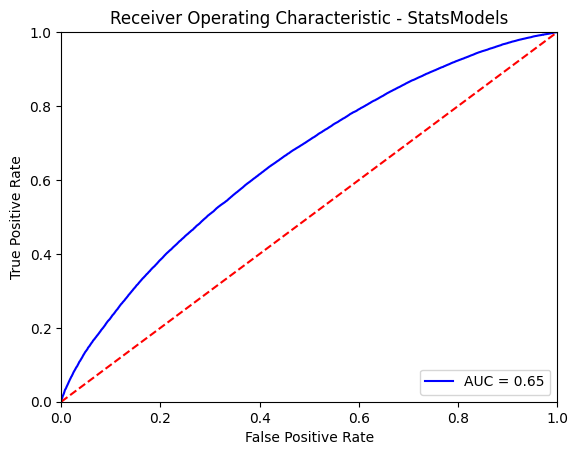

In [ ]:
### Show ROC Curve at Various Thresholds
fpr, tpr, threshold = roc_curve(y_test, p_x)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - StatsModels')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Simple Logistic Regression (Sklearn W Class_Weigth)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
### Create Logistic Object
BaseLogisticModel_Sklearn = LogisticRegression(
    penalty = 'elasticnet',
    fit_intercept = True,
    l1_ratio = 0.8,
    class_weight = 'balanced',
    solver = 'saga',
    # max_iter = 5000,
    random_state = 42
)

In [ ]:
### Fit model on training data
BaseLogisticModel_Sklearn_Fitted = BaseLogisticModel_Sklearn.fit(Diabetes_Train_Modeling,y_train)

In [ ]:
### Make Predictions
y_pred_sklearn = BaseLogisticModel_Sklearn_Fitted.predict_proba(Diabetes_Test_Modeling)[:, 1] ### Grab only probability of positive class
y_pred_sklearn_Series = pd.Series(y_pred_sklearn,index = y_test.index, name = "diagnosed_diabetes")

In [ ]:
### Number of non-0 Coeff
Coeff_DF_BasicElast = pd.DataFrame(zip(Diabetes_Train_Modeling.columns,BaseLogisticModel_Sklearn_Fitted.coef_[0]), columns = {'Feature' : 0, 'Coefficient' : 1})

Coeff_DF_BasicElast.query("Coefficient != 0").count()

,0
Feature,44
Coefficient,44


In [ ]:
### Confusion Matrix
y_hat = (y_pred_sklearn_Series > 0.5)

conf_mat = pd.crosstab(y_test, y_hat, rownames=['Actual Diagnosis'], colnames=['Predicted Diagnosis'])
# Add row and column sums
conf_mat.loc['Column_Total']= conf_mat.sum(numeric_only=True, axis=0)
conf_mat.loc[:,'Row_Total'] = conf_mat.sum(numeric_only=True, axis=1)
print(conf_mat)

Predicted Diagnosis  False   True  Row_Total
Actual Diagnosis                            
0.00                 31224  21515      52739
1.00                 32800  54461      87261
 Column_Total        64024  75976     140000


In [ ]:
### Confusion Matrix Key Metrics at 0.5 cuttoff
FN = 32800
FP = 21515
TN = 31224
TP = 54461
Tot_Positives = FN + TP
Tot_Negatives = FP + TN
N_Plus_P = Tot_Positives + Tot_Negatives

MCR = (FP + FN)/N_Plus_P
TPR = TP/Tot_Positives  ### Out of all positive cases (FN and TP), what % where accurately labeled positive
TNR = TN/Tot_Negatives
precision = TP/(TP + FP) ### Out of all cases labeled Positive (TP and FP) what % were accurately labeled positive

print(f"The Misclassified Rate is: {MCR * 100:.2f}%")
print(f"The True Positive Rate (Sensitivity or Recall) is: {TPR * 100:.2f}%")
print(f"The True Negative Rate (Specifity) is: {TNR * 100:.2f}%")
print(f"The Precision is: {precision * 100:.2f}%")

The Misclassified Rate is: 38.80%
The True Positive Rate (Sensitivity or Recall) is: 62.41%
The True Negative Rate (Specifity) is: 59.20%
The Precision is: 71.68%


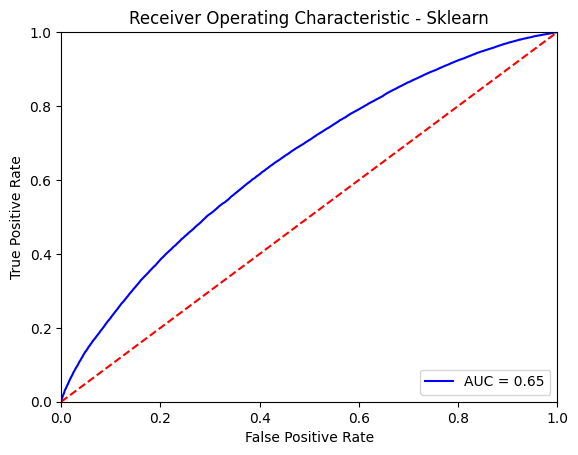

In [ ]:
### Show ROC Curve at Various Thresholds
fpr, tpr, threshold = roc_curve(y_test, y_pred_sklearn)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Sklearn')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic Regression with Class Balance and Elastic Net, same AUC

#### Elastic Net With Cross Validation:

In [ ]:
### Testing different penalty values
np.logspace(-5,-1,10) ### on a log scale (base 10), start and stop points are exponents (Spacings are even in the exponents)

array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])

In [ ]:
### Penalty Tuning Parameters
alphas = np.logspace(-5,-1,10)

In [ ]:
# Create a logistic regression model with L1 penalty and cross-validation
### 5 Cross Validation folds, testing on 10 evenly spaced values for the inverse of the penalty parameter (even spaced)
ElasticNetCV_Sklearn = LogisticRegressionCV(
    class_weight = 'balanced', ### Account for Class Imbalance between Postive and Negative Classes
    fit_intercept = True,
    cv = 5, ### Number of Folds
    Cs = alphas, ### Penalty Terms to test on
    penalty='elasticnet', ### Elastic Net
    l1_ratios = [0.3,0.5,0.9], ### Ratio of Lasso to Ridge (Testing 5 different mixes)
    solver='saga',
    max_iter=10000,
    random_state = 42
    ).fit(Diabetes_Train_Modeling,y_train)  ### 10 alphas * 5 folds * 1 Different mixes of L1 Ratio = 50 fits
# Using saga lover for faster performance
# Took 31 Minutes to run with Cs = np.logspace(-5,4,25)
# Get the best model (with optimal penalty)
Best_Enet_Model = ElasticNetCV_Sklearn

In [ ]:
# Print the coefficients of the best model
count = 0
print("Coefficients of the best Elastic Net Model:")
for feature, coef in zip(Diabetes_Train_Modeling.columns, Best_Enet_Model.coef_[0]):
  count = count + 1
  print(f"{feature}: {coef}")

print(f"Total Features = {count}")

Coefficients of the best Elastic Net Model:
age: 0.2855390834322814
alcohol_consumption_per_week: 0.0
physical_activity_minutes_per_week: -0.3343677978358603
diet_score: -0.054492882777313616
sleep_hours_per_day: 0.0
screen_time_hours_per_day: 0.02248988586758146
bmi: 0.08273915453129015
waist_to_hip_ratio: 0.0
systolic_bp: 0.013727639381904298
diastolic_bp: 0.0
heart_rate: -0.021547588252572168
cholesterol_total: 0.0
hdl_cholesterol: -0.007025087820706831
ldl_cholesterol: 0.034232603441749714
triglycerides: 0.09781710365613762
Systolic_Diastolic_Ratio: 0.0038912264767816955
Good_Vs_Bad_Chol_Ratio: -0.06016595724433883
Alc_Consumption_DietScore: 0.0
Alc_Consumption_SleepHours: 0.0
Alc_Consumption_systolicbp: 0.0
Alc_Consumption_diastolicbp: 0.0
Alc_Consumption_hdlChol: 0.0
Alc_Consumption_triglycerides: 0.0
age_squared: 0.008310567791302459
gender_Male: 0.0
gender_Other: 0.0
ethnicity_Black: 0.0
ethnicity_Hispanic: 0.0
ethnicity_Other: 0.0
ethnicity_White: 0.0
education_level_Highschoo

In [ ]:
### DF of Coefficients
pd.set_option('display.float_format', '{:.10f}'.format)

Coefficient_DF = pd.DataFrame(zip(Diabetes_Train_Modeling.columns, Best_Enet_Model.coef_[0]), columns = ['Feature','Coefficient'])

In [ ]:
### Zeroed Out Coefficients
Coefficient_DF[Coefficient_DF['Coefficient'] == 0]

,Feature,Coefficient
1,alcohol_consumption_per_week,0.0000000000
4,sleep_hours_per_day,0.0000000000
7,waist_to_hip_ratio,0.0000000000
9,diastolic_bp,0.0000000000
11,cholesterol_total,0.0000000000
17,Alc_Consumption_DietScore,0.0000000000
18,Alc_Consumption_SleepHours,0.0000000000
19,Alc_Consumption_systolicbp,0.0000000000
20,Alc_Consumption_diastolicbp,0.0000000000
21,Alc_Consumption_hdlChol,0.0000000000


In [ ]:
### Non-Zero Coefficients
Coefficient_DF[Coefficient_DF['Coefficient'] != 0]

,Feature,Coefficient
0,age,0.2855390834
2,physical_activity_minutes_per_week,-0.3343677978
3,diet_score,-0.0544928828
5,screen_time_hours_per_day,0.0224898859
6,bmi,0.0827391545
8,systolic_bp,0.0137276394
10,heart_rate,-0.0215475883
12,hdl_cholesterol,-0.0070250878
13,ldl_cholesterol,0.0342326034
14,triglycerides,0.0978171037


In [ ]:
### See total coefficients that were not reduced to 0
Total_Nonzero_Coef = np.count_nonzero(Best_Enet_Model.coef_)

print(f"Total Non-Zero Coefficients {Total_Nonzero_Coef}")

Total Non-Zero Coefficients 13


In [ ]:
### Optimal Penalty Value (C)
Best_C = Best_Enet_Model.C_[0]

print(f"Optimal Penalty Term: {Best_C}")

Optimal Penalty Term: 0.00021544346900318823


In [ ]:
#### Optimal Lasso Mix
Best_l1Ratio = Best_Enet_Model.l1_ratio_

print(f"Optimal L1 Ratio: {Best_l1Ratio}")

Optimal L1 Ratio: [0.5]


In [ ]:
### Set Model
ElasticNetModel_Optimal = LogisticRegression(
    penalty = 'elasticnet',
    fit_intercept = True,
    l1_ratio = Best_l1Ratio[0],
    C = Best_C,
    class_weight = 'balanced',
    solver = 'saga',
    # max_iter = 5000,
    random_state = 42
)
### Fit Model
ElasticNetModel_Optimal_Fitted = ElasticNetModel_Optimal.fit(Diabetes_Train_Modeling,y_train)

In [ ]:
# Predict probabilities using the best LASSO model
p_x_ElasticNet_optimal = ElasticNetModel_Optimal_Fitted.predict_proba(Diabetes_Test_Modeling)[:, 1]

# Classify predictions based on a 0.5 cutoff
y_hat_ElesticNet_optimal = (p_x_ElasticNet_optimal > 0.5)

In [ ]:
# Create confusion matrix
conf_mat_ElasNet_Optimal = pd.crosstab(y_test, y_hat_ElesticNet_optimal, rownames=['Actual Diagnosis'], colnames=['Predicted Diagnosis'])

# Add row and column sums
conf_mat_ElasNet_Optimal.loc['Column_Total'] = conf_mat_ElasNet_Optimal.sum(numeric_only=True, axis=0)
conf_mat_ElasNet_Optimal.loc[:, 'Row_Total'] = conf_mat_ElasNet_Optimal.sum(numeric_only=True, axis=1)

print("\nConfusion Matrix (Elastic Net Optimal):")
print(conf_mat_ElasNet_Optimal)


Confusion Matrix (Elastic Net Optimal):
Predicted Diagnosis  False   True  Row_Total
Actual Diagnosis                            
0.0000000000         30753  21986      52739
1.0000000000         32210  55051      87261
 Column_Total        62963  77037     140000


In [ ]:
### Confusion Matrix Key Metrics at 0.5 cuttoff
FN = 32210
FP = 21986
TN = 30753
TP = 55051
Tot_Positives = FN + TP
Tot_Negatives = FP + TN
N_Plus_P = Tot_Positives + Tot_Negatives

MCR = (FP + FN)/N_Plus_P
TPR = TP/Tot_Positives  ### Out of all positive cases (FN and TP), what % where accurately labeled positive
TNR = TN/Tot_Negatives
precision = TP/(TP + FP) ### Out of all cases labeled Positive (TP and FP) what % were accurately labeled positive

print(f"The Misclassified Rate is: {MCR * 100:.2f}%")
print(f"The True Positive Rate (Sensitivity or Recall) is: {TPR * 100:.2f}%")
print(f"The True Negative Rate (Specifity) is: {TNR * 100:.2f}%")
print(f"The Precision is: {precision * 100:.2f}%")

The Misclassified Rate is: 38.71%
The True Positive Rate (Sensitivity or Recall) is: 63.09%
The True Negative Rate (Specifity) is: 58.31%
The Precision is: 71.46%


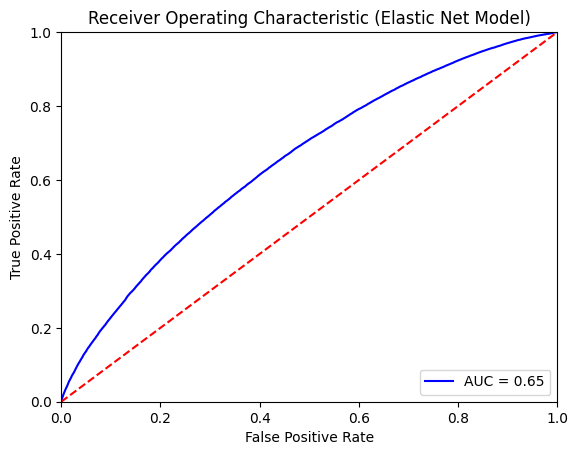

In [ ]:
# Generate ROC curve
fpr_els, tpr_els, threshold_els = roc_curve(y_test, p_x_ElasticNet_optimal)
roc_auc_els = auc(fpr_els, tpr_els)

plt.title('Receiver Operating Characteristic (Elastic Net Model)')
plt.plot(fpr_els, tpr_els, 'b', label='AUC = %0.2f' % roc_auc_els)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Prep For Kaggle Submission

In [ ]:
### Test Feature Matrix
X_Test_Kaggle = Diabetes_Test_Modeling_Kaggle
X_Test_Kaggle.shape

(300000, 44)

In [ ]:
### Predict Probabilities Using optimal Elastic Net Model
p_x_ElasticNet_KaggleTest = ElasticNetModel_Optimal_Fitted.predict_proba(X_Test_Kaggle)[:, 1]

In [ ]:
### Grab IDs from Test DF
Diabetes_Test_IDs = pd.read_csv("test.csv")['id']

In [ ]:
#### Convert Probability Array to Dataframe
Prob_DF = pd.DataFrame(p_x_ElasticNet_KaggleTest).rename(columns = {0 : 'diagnosed_diabetes'})
### Concatenate Ids to Probabilites
Final_Predictions = pd.concat([Diabetes_Test_IDs,Prob_DF], axis = 1)

In [ ]:
### Show Predictions DF
Final_Predictions.head(10)

,id,diagnosed_diabetes
0,700000,0.4767862135
1,700001,0.4763732683
2,700002,0.5762626901
3,700003,0.5435099807
4,700004,0.7025151567
5,700005,0.4840901816
6,700006,0.6949799065
7,700007,0.5488463378
8,700008,0.4914370967
9,700009,0.5890112375


In [ ]:
# File Path
Final_Predictions.to_csv("Kaggle_Diabetes_Submission.csv", index = False)